In [55]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

In [144]:
elements_N = 1000
max_class_numbers = 50
class_numbers = np.arange(2, max_class_numbers)
ms = 50 / np.log(max_class_numbers)

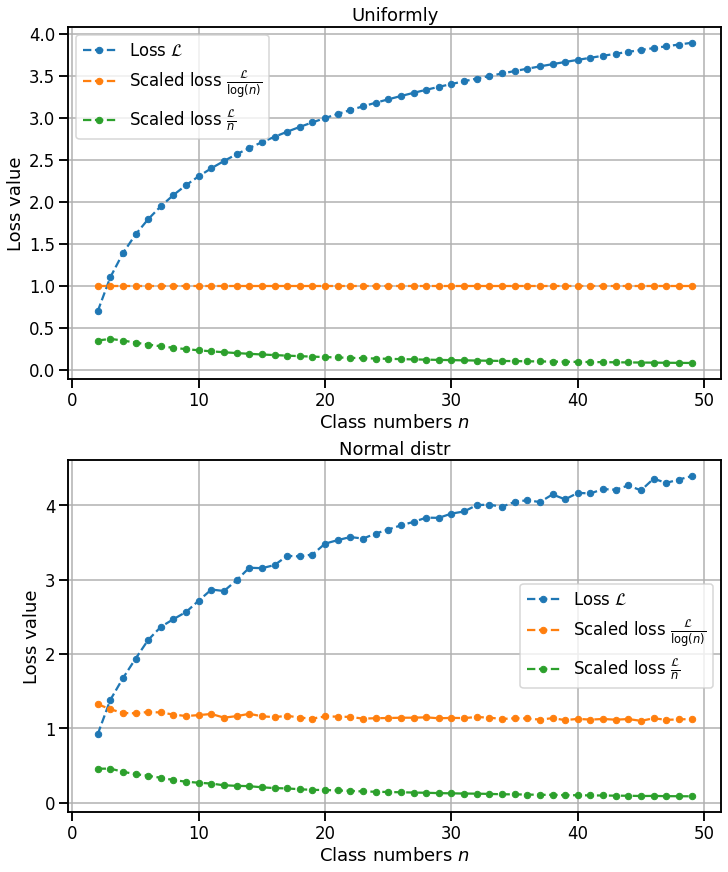

In [145]:
titles = ['Uniformly', 'Normal distr']
generators = [torch.ones, torch.randn]

fig, axis = plt.subplots(len(titles), 1, figsize=(10, 6*len(generators)), constrained_layout=True)

for (title, input_gen), ax in zip(zip(['Uniformly', 'Normal distr'], [torch.ones, torch.randn]), axis):    
    losses = []
    losses_my = []

    log_scaled_losses = []
    lin_scaled_losses = []

    for class_number in class_numbers:
        input = input_gen(elements_N, class_number)
        target = torch.randint(class_number, (elements_N,), dtype=torch.int64)
        loss = F.cross_entropy(input, target)
        losses.append(loss)

        log_scaled_losses.append(loss / np.log(class_number))
        lin_scaled_losses.append(loss / class_number)

    ax.plot(class_numbers, losses, '.--', ms=ms, label=r'Loss $\mathcal{L}$')
    ax.plot(class_numbers, log_scaled_losses, '.--', ms=ms, label=r'Scaled loss $\frac{\mathcal{L}}{\log(n)}$')
    ax.plot(class_numbers, lin_scaled_losses, '.--', ms=ms, label=r'Scaled loss $\frac{\mathcal{L}}{n}$')
    ax.legend()
    ax.grid()
    ax.set_xlabel(r'Class numbers $n$')
    ax.set_ylabel('Loss value')
    ax.set_title(title)

In [190]:
values_scaler

tensor([3, 5, 5, 2, 1, 3, 4, 2, 2, 3, 3, 1, 2, 5, 1, 2, 3, 3, 2, 1, 3, 5, 2, 5,
        3, 5, 5, 2, 3, 1, 1, 3, 5, 4, 4, 5, 2, 2, 3, 1, 3, 5, 3, 2, 4, 2, 4, 2,
        3, 5])

Text(0.5, 1.0, 'MSE')

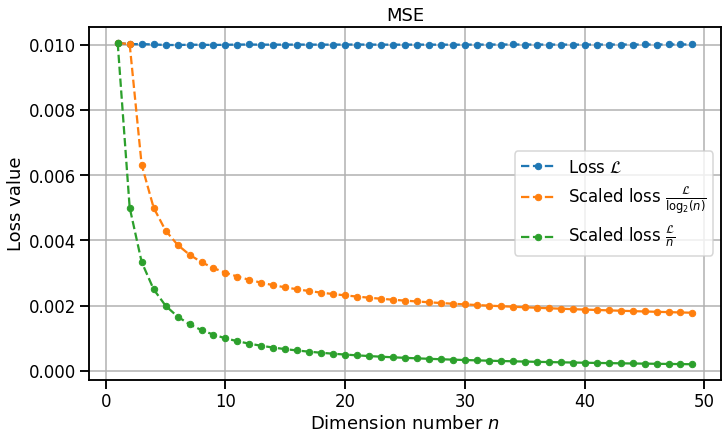

In [215]:
losses = []
losses_my = []
log_scaled_losses = []
lin_scaled_losses = []

elements_N = 100000
max_class_numbers = 50
class_numbers = np.arange(1, max_class_numbers)
ms = 50 / np.log(max_class_numbers)

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)
   
offset = 0.1 * torch.randn(elements_N, max_class_numbers)

max_values_scale = 1
values_scaler = torch.randint(1, max_values_scale + 1, (max_class_numbers, ))

for class_number in class_numbers:
    input = values_scaler[:class_number] * torch.ones(elements_N, class_number)    
    target = input + values_scaler[:class_number] * offset[:, :class_number]
       
    loss = F.mse_loss(input, target)
    losses.append(loss)
    
    if class_number > 1:
        log_scaled_losses.append(loss / np.log2(class_number))
    else:
        log_scaled_losses.append(loss)
        
    lin_scaled_losses.append(loss / class_number)

ax.plot(class_numbers, losses, '.--', ms=ms, label=r'Loss $\mathcal{L}$')
ax.plot(class_numbers, log_scaled_losses, '.--', ms=ms, label=r'Scaled loss $\frac{\mathcal{L}}{\log_2(n)}$')
ax.plot(class_numbers, lin_scaled_losses, '.--', ms=ms, label=r'Scaled loss $\frac{\mathcal{L}}{n}$')
ax.legend()
ax.grid()
ax.set_xlabel(r'Dimension number $n$')
ax.set_ylabel('Loss value')
ax.set_title('MSE')